# Import Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Load Data

In [ ]:
# load the csv file

df = pd.read_csv("swiggy.csv")

df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [ ]:
# shape of data

rows, cols = df.shape

print("The dataset has {} rows and {} columns".format(rows,cols))

The dataset has 45593 rows and 20 columns


In [ ]:
# datatypes of columns

(
    df.dtypes
    .rename("Data Types")
)

,Data Types
ID,object
Delivery_person_ID,object
Delivery_person_Age,object
Delivery_person_Ratings,object
Restaurant_latitude,float64
Restaurant_longitude,float64
Delivery_location_latitude,float64
Delivery_location_longitude,float64
Order_Date,object
Time_Orderd,object


In [ ]:
# info about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

**Corrections**:

1. Age column should be numerical.
2. Ratings should be float.
3. Date and time columns should be date and time.
4. Vehicle conditions seems to be categorical column which is integer encoded.
5. Multiple deliveries should be integer column.
6. Target column should also be numbers.

In [ ]:
# missing values in data

df.isna().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,0
Delivery_person_Ratings,0
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,0


In [ ]:
df.isna().sum().sum()

0

**There are no missing values in the data**

In [ ]:
# sample 50 rows of data for viewing

df.sample(50)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
10332,0xb089,SURRES01DEL01,36,4.6,21.186438,72.794115,21.256438,72.864115,02-04-2022,22:35:00,22:40:00,conditions Sandstorms,Low,1,Snack,scooter,0,No,Metropolitian,(min) 19
26307,0xce11,LUDHRES03DEL01,20,4.8,30.887220,75.804893,30.897220,75.814893,15-02-2022,10:50:00,10:55:00,conditions Stormy,Low,2,Buffet,scooter,1,No,Metropolitian,(min) 13
9091,0xad2c,CHENRES19DEL02,28,4.9,12.986047,80.218114,13.116047,80.348114,04-03-2022,23:00:00,23:10:00,conditions Stormy,Low,1,Buffet,motorcycle,0,No,Urban,(min) 10
43527,0x4bde,COIMBRES04DEL01,30,4.9,11.024839,77.007003,11.134839,77.117003,14-03-2022,20:00:00,20:05:00,conditions Sunny,Jam,1,Snack,scooter,1,No,Metropolitian,(min) 28
5745,0x9dd9,MYSRES05DEL01,23,4.1,12.323978,76.627961,12.393978,76.697961,12-03-2022,21:10:00,21:15:00,conditions Cloudy,Jam,2,Buffet,scooter,0,No,Metropolitian,(min) 39
3976,0xb9d2,SURRES13DEL01,23,4.9,21.170096,72.789122,21.180096,72.799122,11-03-2022,09:35:00,09:50:00,conditions Windy,Low,2,Buffet,electric_scooter,1,No,NaN,(min) 12
8779,0x6720,MUMRES06DEL01,39,4.7,19.055831,72.833984,19.095831,72.873984,03-04-2022,14:40:00,14:45:00,conditions Sunny,High,2,Drinks,motorcycle,0,No,Metropolitian,(min) 23
8243,0xc66a,BHPRES08DEL02,35,4,23.232537,77.429845,23.252537,77.449845,17-02-2022,09:25:00,09:40:00,conditions Sandstorms,Low,0,Snack,motorcycle,1,No,Metropolitian,(min) 21
36428,0x64db,INDORES09DEL02,31,4,22.725835,75.887648,22.855835,76.017648,14-03-2022,20:35:00,20:40:00,conditions Fog,Jam,1,Snack,scooter,1,No,Metropolitian,(min) 38
43262,0xce23,DEHRES17DEL02,31,4.6,30.327968,78.046106,30.407968,78.126106,18-02-2022,23:30:00,23:40:00,conditions Sunny,Low,2,Meal,scooter,0,No,Metropolitian,(min) 16


**NaN values in the data**

Investigate further

# Missing values

Missing values are string type in the data with an extra space.

In [ ]:
df.loc[43317,"Delivery_person_Ratings"]

'NaN '

In [ ]:
# String NaNs in the data

(df == "NaN ").sum().sum()

8515

8515 such NaN's in the data

In [ ]:
# column wise string NaNs

(df == "NaN ").sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,1854
Delivery_person_Ratings,1908
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,1731


In [ ]:
# replace string NaN with NaN

df.replace("NaN ",np.NaN)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [ ]:
# verify missing values in the data

df.replace("NaN ",np.NaN).isna().sum().sum()

8515

**Verified that string NaNs converted to Nan**

In [ ]:
# NaN in the weather column
(
    df.loc[:,"Weatherconditions"]
    .str.replace("conditions ","")
    .replace("NaN",np.NaN)
    .isna().sum()
)

616

**616 missing values in the weather column**

In [ ]:
# df with all the missing values replace

missing_df = (
    df.replace("NaN ",np.NaN)
    .assign(
        Weatherconditions = lambda df_ : (
            df_['Weatherconditions']
            .str.replace("conditions ","")
            .replace("NaN",np.NaN)
            )
    )
)

missing_df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [ ]:
# missing values in data

missing_df.isna().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,1854
Delivery_person_Ratings,1908
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,1731


In [ ]:
# total missing values in data

missing_df.isna().sum().sum()

9131

In [ ]:
8515 + 616

9131

## Missing Value Analysis

### Matrix

<Axes: >

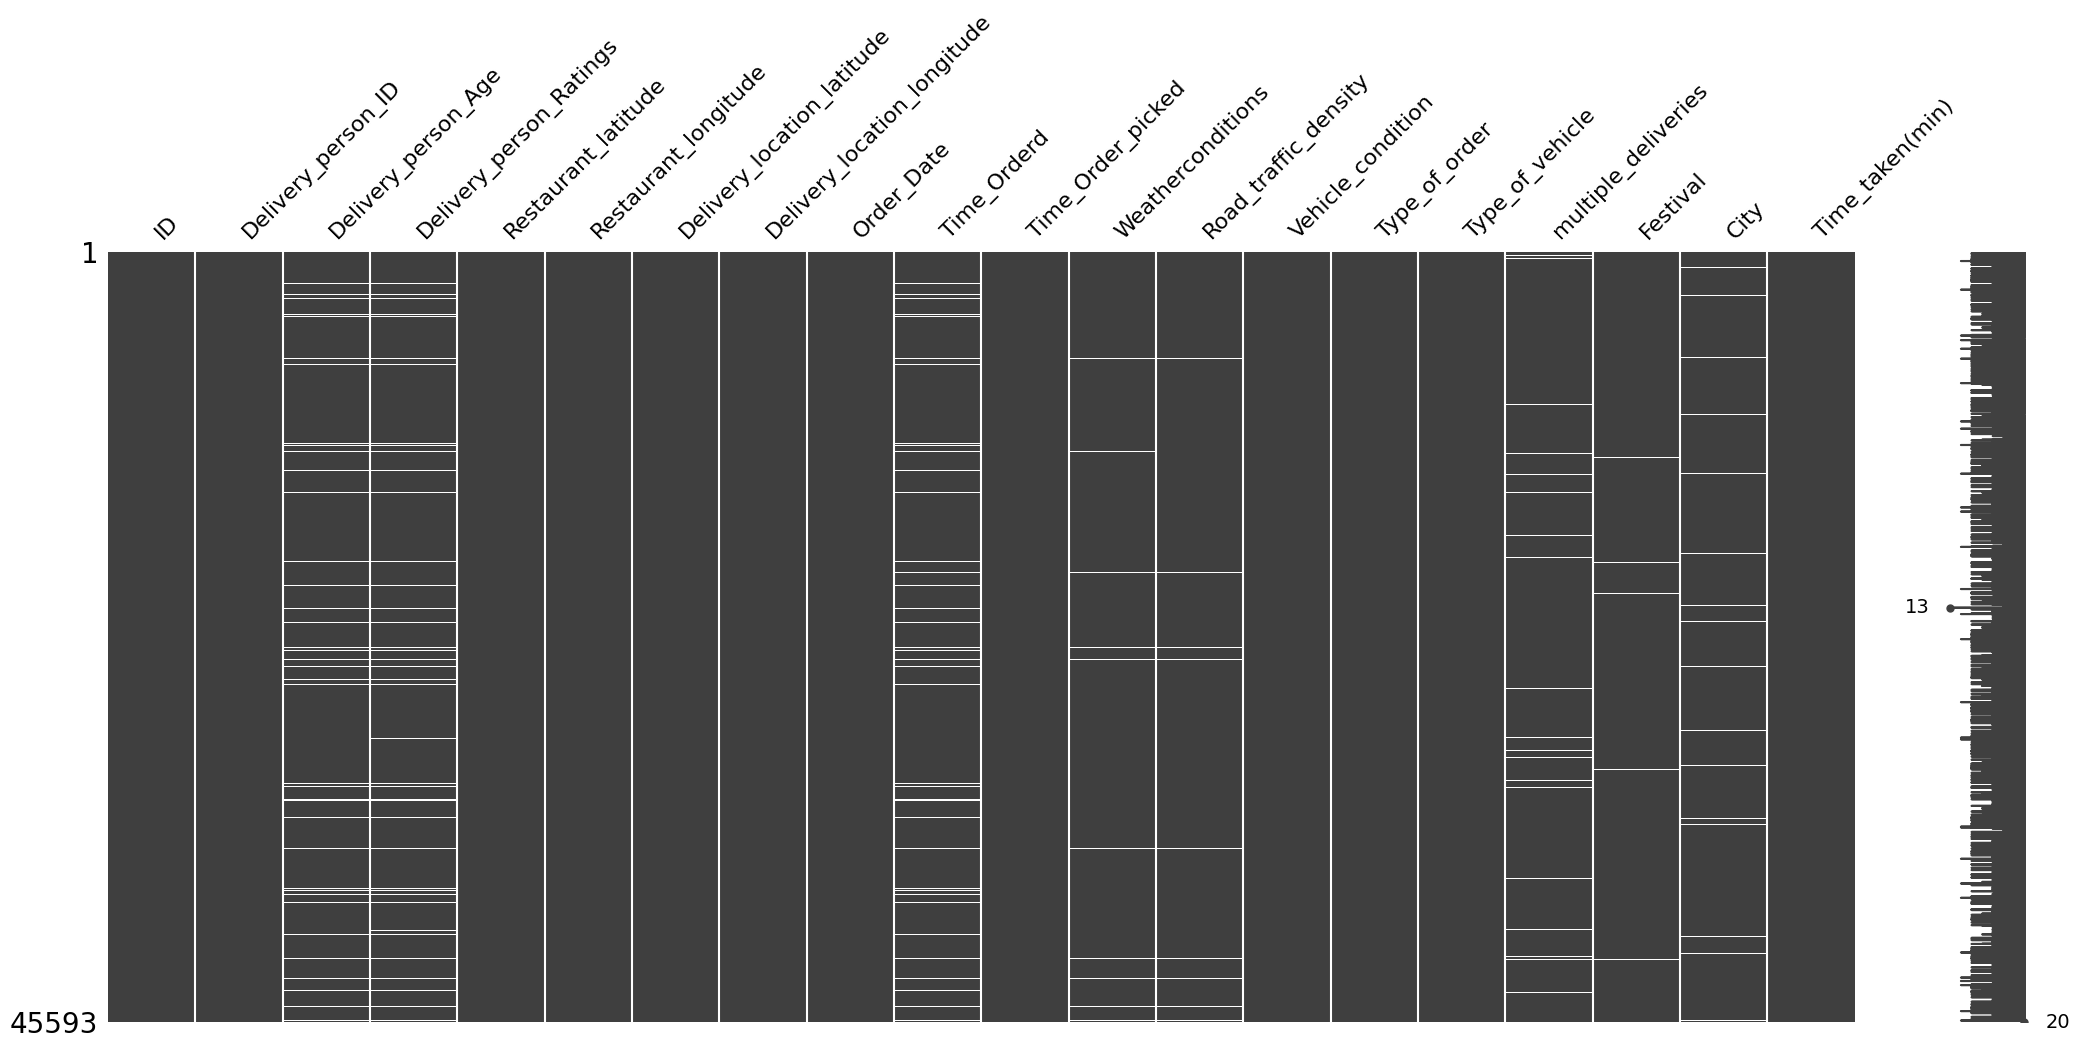

In [ ]:
# missing values matrix

msno.matrix(missing_df)

### Count of Missing Values

<Axes: >

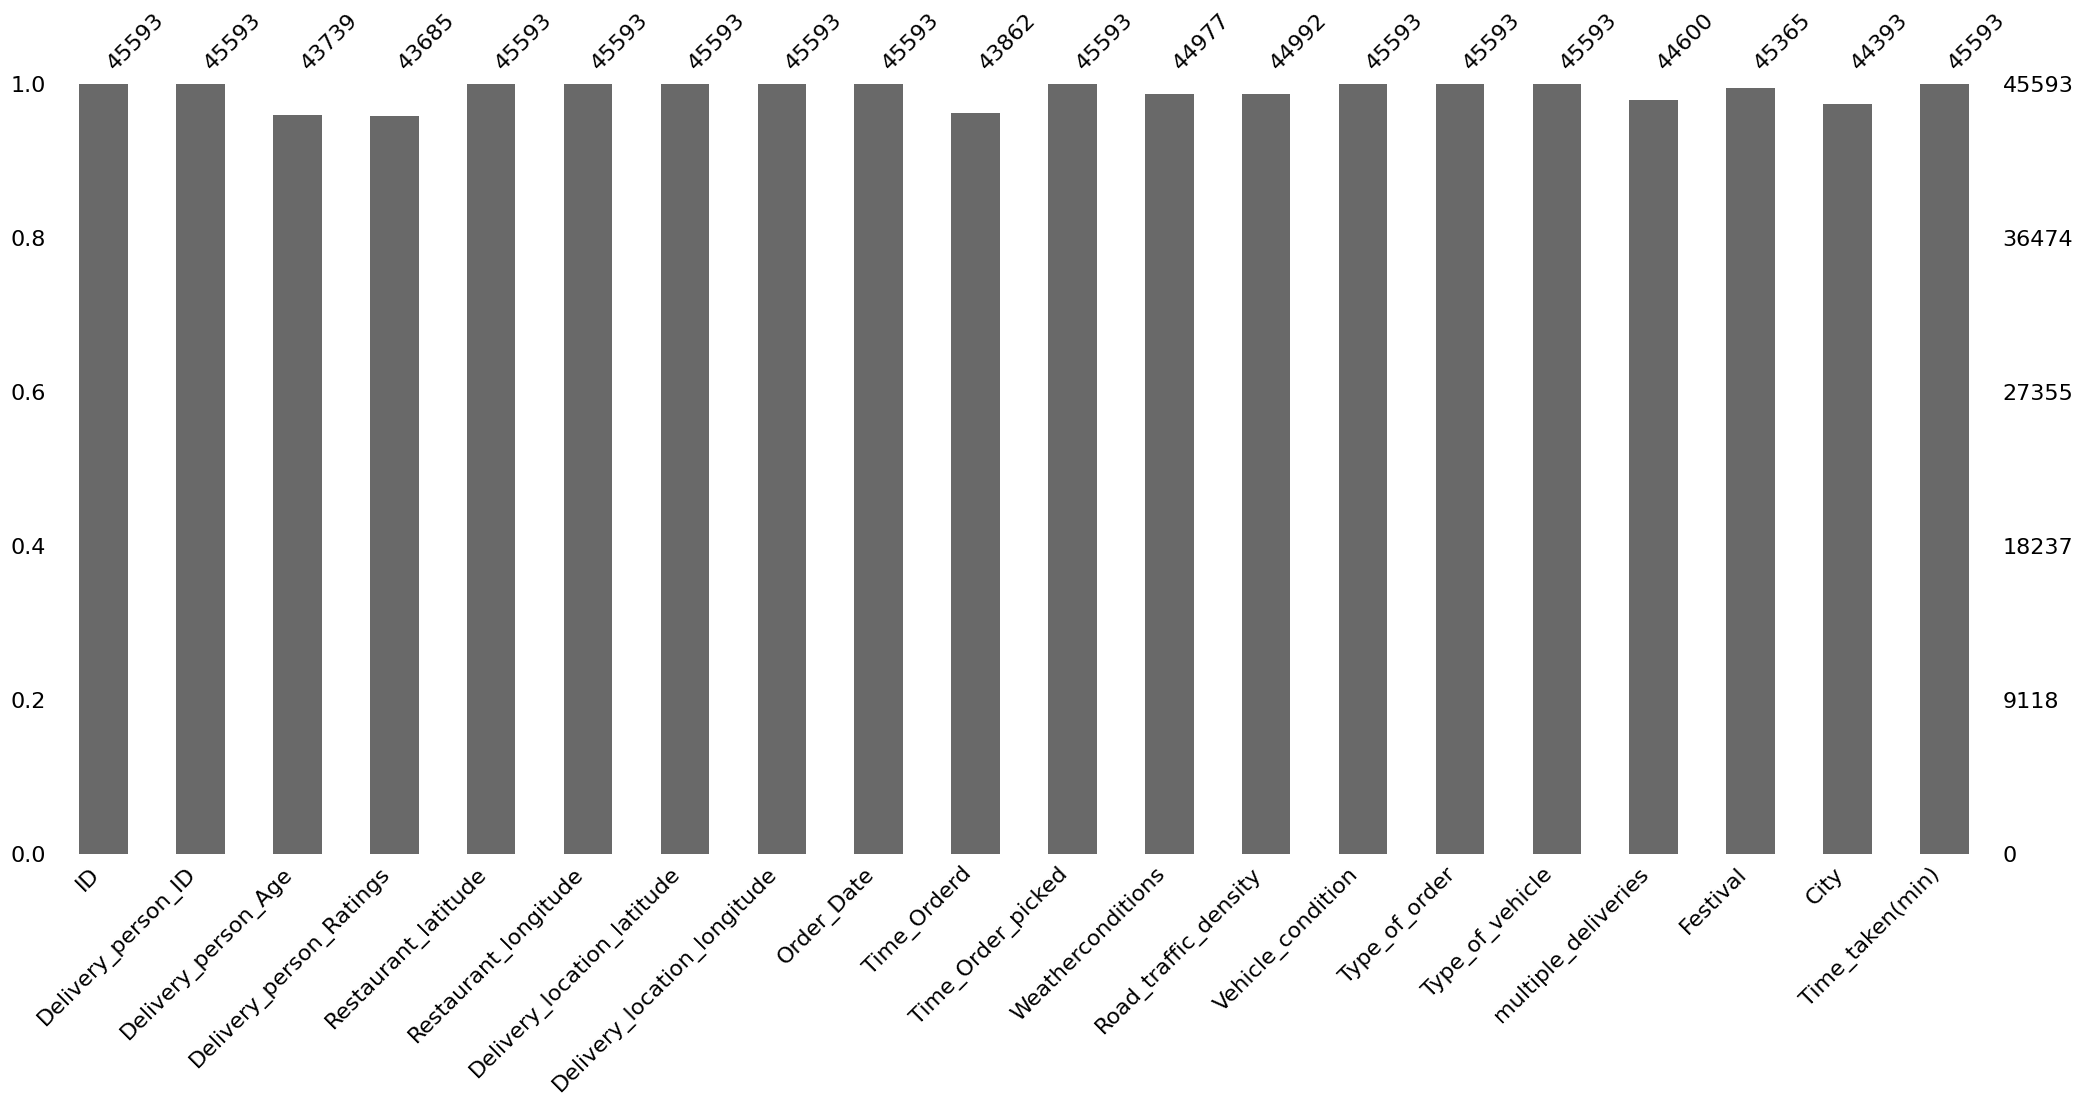

In [ ]:
# bar plot for columns having missing data

msno.bar(missing_df)

### Missing Corr

<Axes: >

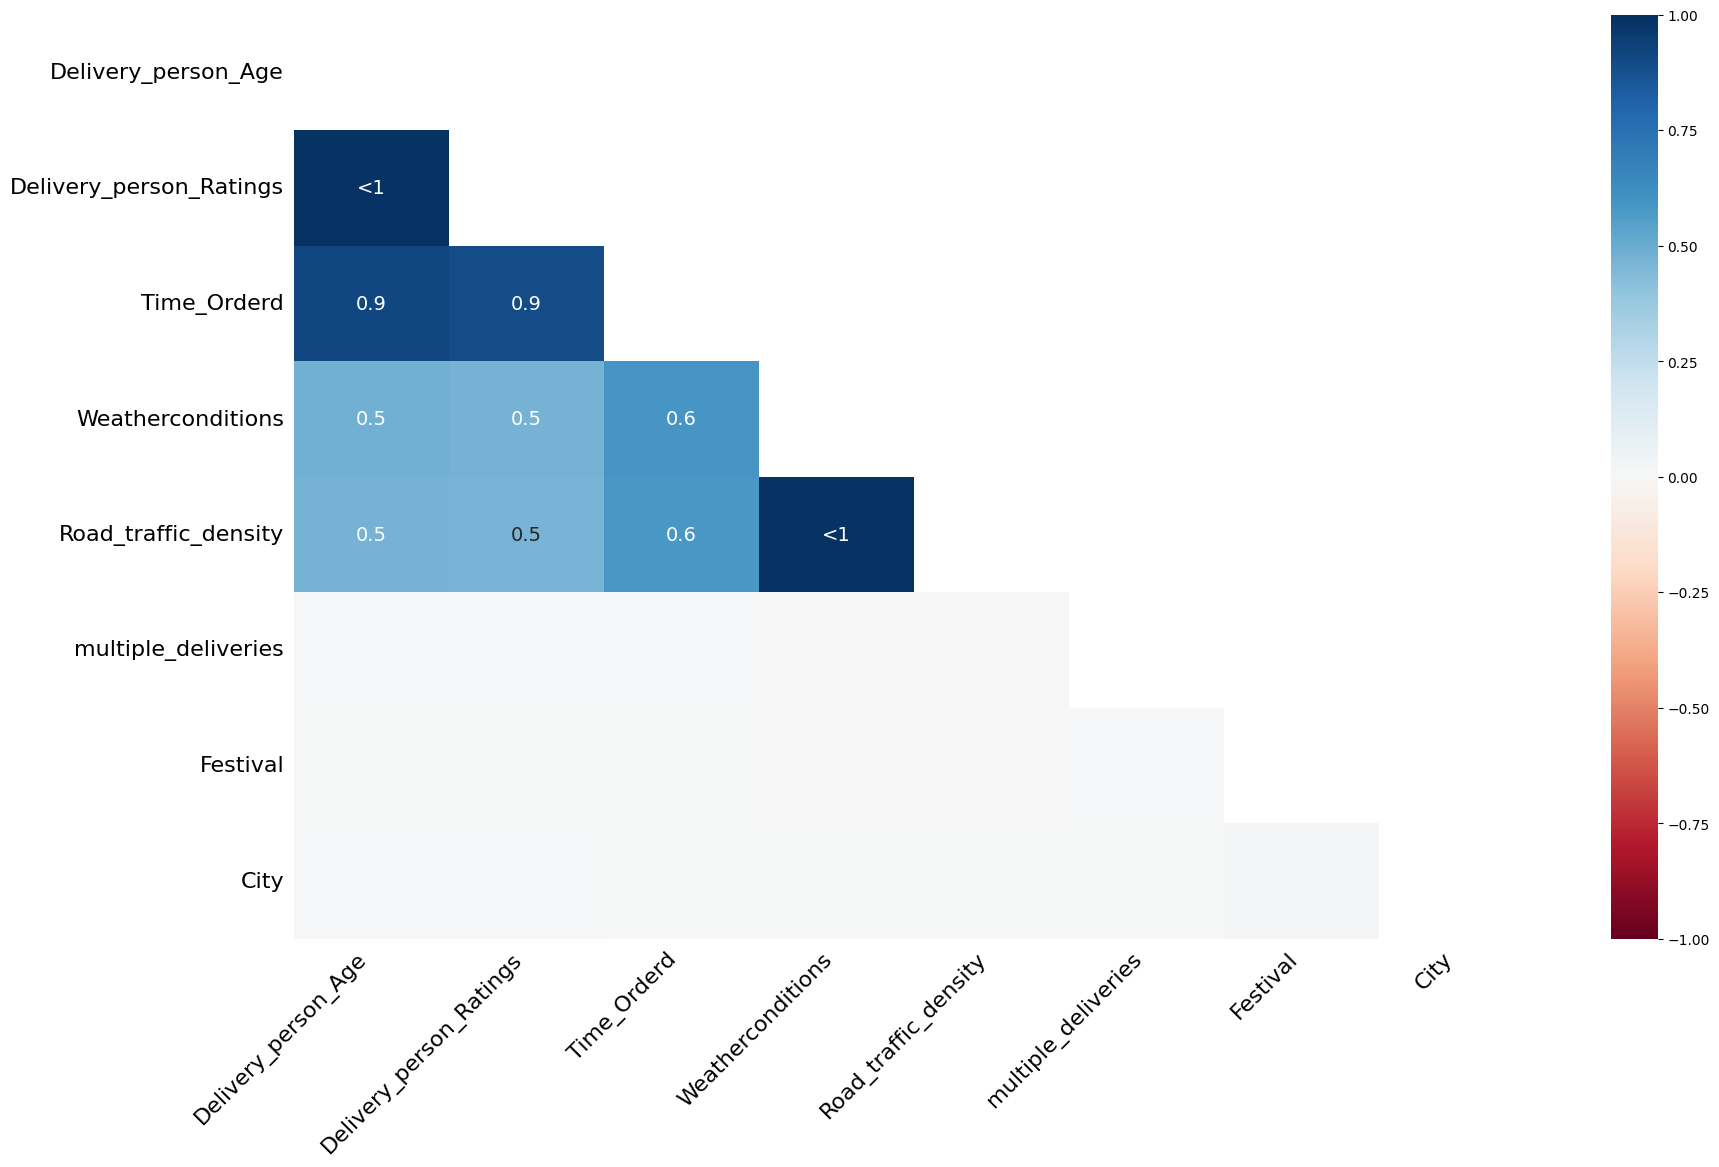

In [ ]:
# missing data correlation

msno.heatmap(missing_df)

**Observations**

1. The delivery person columns are correlated to each other. This means that missingness in these columns is highly related which means lack of rider data.
2. The time ordered column is also related to the rider which shows that the data might be missing due to some network error where the system was unable to log rider details and time of order.
3. There is a very high correlation between weather patterns and the road traffic information. Be clear that this does not mean that the road traffic and weather columns are correlated. High corr in missingness means that if value in one column is missing, it is a high chance that it will be missing in others as well.
3. Road traffic density also shows correlation to the rider as it might be provided through the phone of rider (need to investigate).


In [ ]:
missing_df[["Weatherconditions","Road_traffic_density"]].isna().sum()

,0
Weatherconditions,616
Road_traffic_density,601


In [ ]:
# prove point of missingness

(
    missing_df[["Weatherconditions","Road_traffic_density"]]
    .isna().all(axis=1)
    .sum()
) /  missing_df[["Weatherconditions","Road_traffic_density"]].isna().sum()

,0
Weatherconditions,0.975649
Road_traffic_density,1.000000


### Dendrogram

<Axes: >

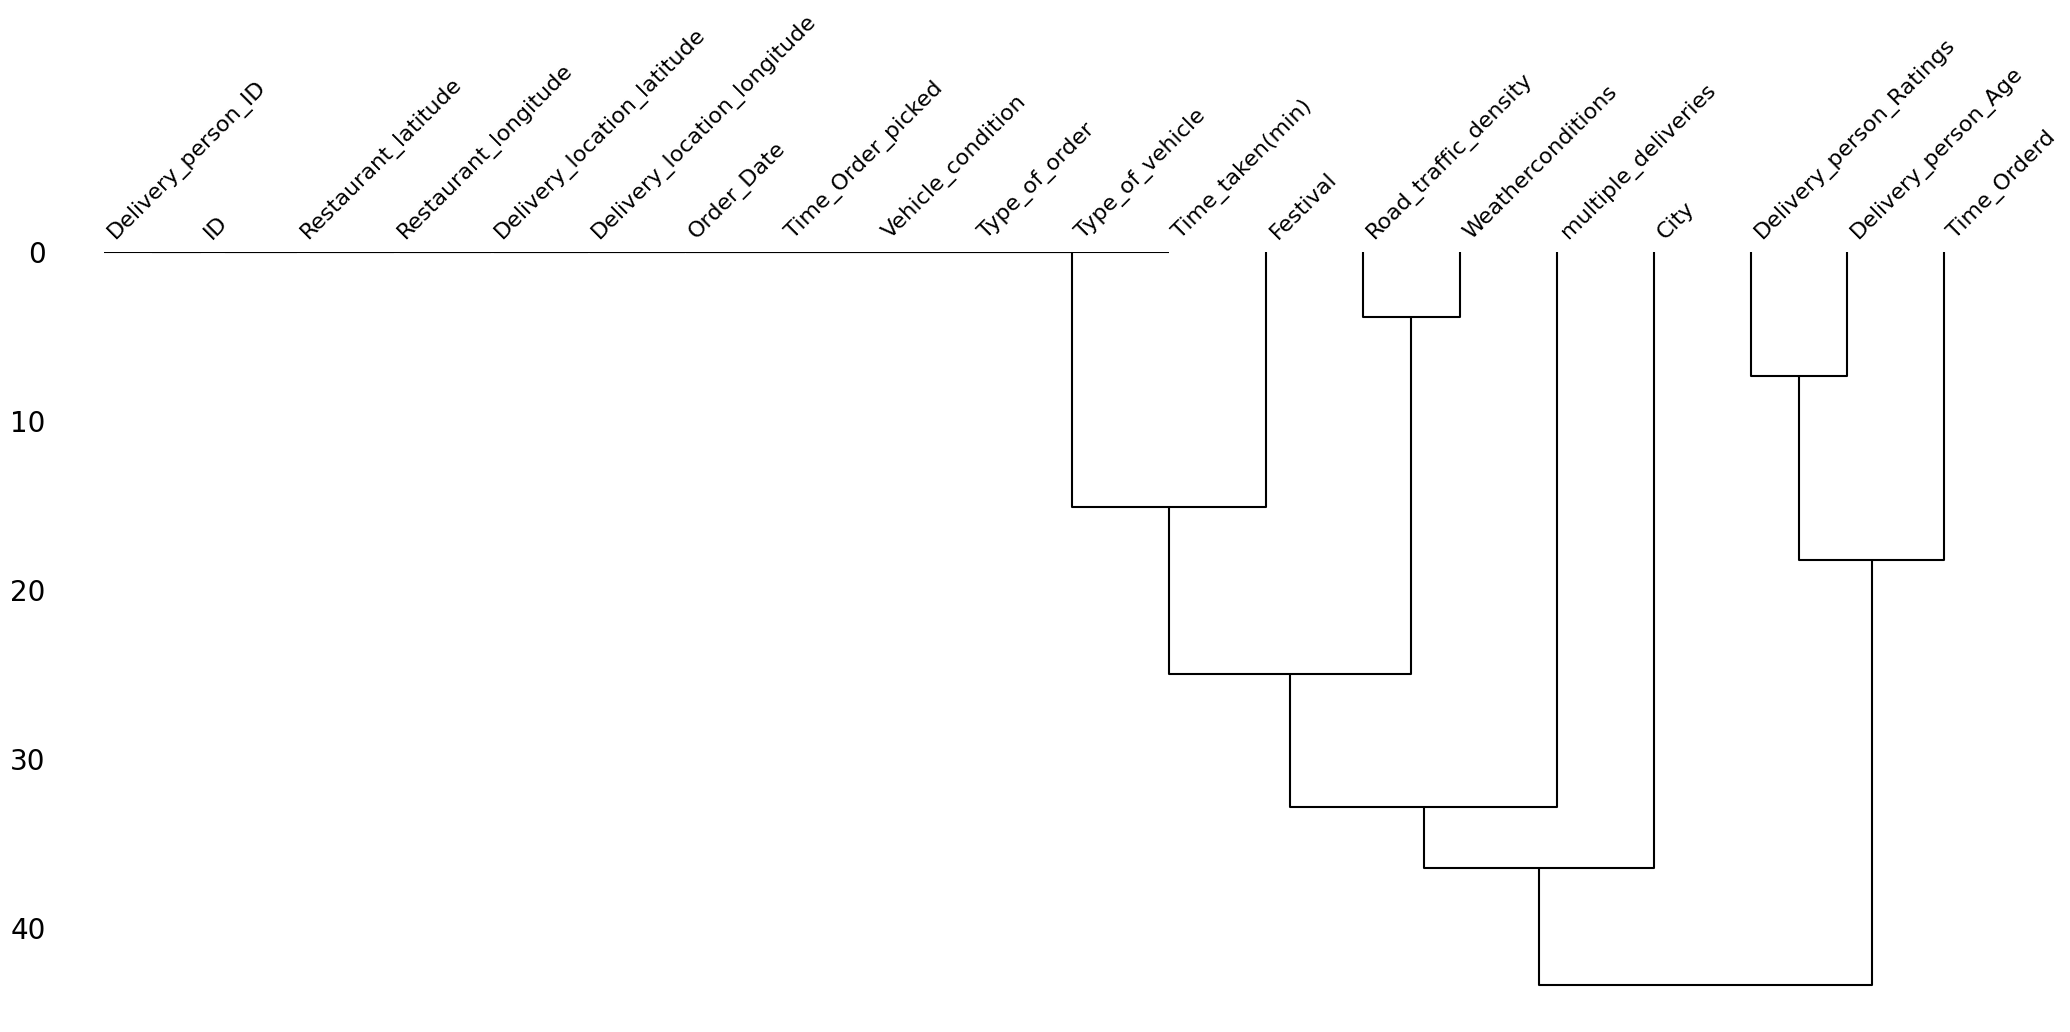

In [ ]:
# dendrogram of missingness

msno.dendrogram(missing_df)

In [ ]:
# percentage of rows in the data having missing value

(missing_df.isna().any(axis=1).sum() / missing_df.shape[0]) * 100

9.266773408198627

**About `9%` of the rows in the data have missing values**

# Basic Data Cleaning

In [ ]:
# column names in data

df.columns.tolist()

['ID',
 'Delivery_person_ID',
 'Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Order_Date',
 'Time_Orderd',
 'Time_Order_picked',
 'Weatherconditions',
 'Road_traffic_density',
 'Vehicle_condition',
 'Type_of_order',
 'Type_of_vehicle',
 'multiple_deliveries',
 'Festival',
 'City',
 'Time_taken(min)']

In [ ]:
def change_column_names(data: pd.DataFrame):
    return (
        data.rename(str.lower,axis=1)
        .rename({
            "delivery_person_id" : "rider_id",
            "delivery_person_age": "age",
            "delivery_person_ratings": "ratings",
            "delivery_location_latitude": "delivery_latitude",
            "delivery_location_longitude": "delivery_longitude",
            "time_orderd": "order_time",
            "time_order_picked": "order_picked_time",
            "weatherconditions": "weather",
            "road_traffic_density": "traffic",
            "city": "city_type",
            "time_taken(min)": "time_taken"},axis=1)
    )

In [ ]:
# change column names

df = change_column_names(df)

In [ ]:
df.head()

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [ ]:
# check for duplicate rows

df.drop(columns=["id","rider_id"]).duplicated().sum()

0

**There are no duplicate rows in the data**

## Column Wise Cleaning

### ID

In [ ]:
# unique items in ID column

print(f"The number of unique IDs are {df['id'].nunique()}")

The number of unique IDs are 45593


**All the ID values are unique**

This column can be dropped from the data

### Rider Id

In [ ]:
# unique rider ids in the column

df['rider_id'].nunique()

1320

**The data contains 1320 unique riders**

In [ ]:
# rider order count in data

df['rider_id'].value_counts()

,count
rider_id,
PUNERES01DEL01,67
JAPRES11DEL02,67
HYDRES04DEL02,66
JAPRES03DEL01,66
VADRES11DEL02,66
...,...
DEHRES18DEL03,7
AURGRES11DEL03,7
KOLRES09DEL03,6


In [ ]:
# extract city name out of rider id

(
    df['rider_id']
    .str.split("RES")
    .str.get(0)
    .rename("City_Name")
)

,City_Name
0,INDO
1,BANG
2,BANG
3,COIMB
4,CHEN
...,...
45588,JAP
45589,AGR
45590,CHEN
45591,COIMB


### Age

In [ ]:
# datatype

df['age'].dtype

dtype('O')

In [ ]:
# min, mean and max values

df['age'].astype(float).describe()

,age
count,43739.000000
mean,29.567137
std,5.815155
min,15.000000
25%,25.000000
50%,30.000000
75%,35.000000
max,50.000000


**Minimum Rider age of 15 is concerning**

Investigate further what type of transport is he using?

<Axes: ylabel='age'>

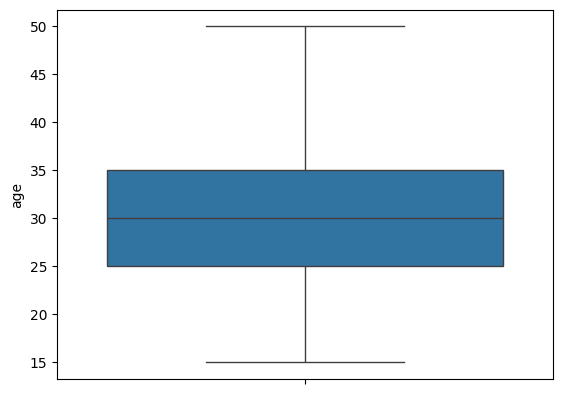

In [ ]:
# boxplot of the age column

sns.boxplot(df['age'].astype(float))

In [ ]:
# rows of data where rider age is less than 18(minor)


minors_data = df.loc[df['age'].astype('float') < 18]

minors_data

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
2387,0x564,JAPRES15DEL03,15,1,-26.891191,75.802083,26.981191,75.892083,12-03-2022,NaN,17:20:00,conditions NaN,NaN,3,Meal,motorcycle,0,No,Urban,(min) 15
2905,0xcd0,INDORES010DEL03,15,1,22.750040,75.902847,22.810040,75.962847,03-04-2022,NaN,20:30:00,conditions NaN,NaN,3,Snack,scooter,1,No,Metropolitian,(min) 29
2951,0x91a,SURRES17DEL03,15,1,21.149569,72.772697,21.209569,72.832697,21-03-2022,NaN,22:10:00,conditions NaN,NaN,3,Buffet,bicycle,1,No,Metropolitian,(min) 20
5902,0x474,CHENRES15DEL03,15,1,13.026286,80.275235,13.056286,80.305235,11-03-2022,NaN,20:50:00,conditions NaN,NaN,3,Drinks,bicycle,1,No,Metropolitian,(min) 25
9156,0x73f,BANGRES05DEL01,15,1,12.970324,77.645748,13.080324,77.755748,25-03-2022,NaN,23:25:00,conditions NaN,NaN,3,Buffet,motorcycle,2,No,Metropolitian,(min) 34
10900,0x1b49,MUMRES14DEL02,15,1,19.181300,72.836191,19.231300,72.886191,30-03-2022,NaN,20:55:00,conditions NaN,NaN,3,Buffet,motorcycle,1,No,Metropolitian,(min) 39
11125,0x40b,SURRES12DEL01,15,1,-21.183434,-72.814492,21.193434,72.824492,05-03-2022,NaN,11:30:00,conditions NaN,NaN,3,Meal,scooter,1,No,Urban,(min) 27
12093,0x523,INDORES03DEL02,15,1,22.751857,75.866699,22.801857,75.916699,24-03-2022,NaN,21:15:00,conditions NaN,NaN,3,Buffet,bicycle,0,No,Metropolitian,(min) 28
15124,0x18b0,RANCHIRES02DEL01,15,1,0.000000,0.000000,0.070000,0.070000,16-03-2022,NaN,23:55:00,conditions NaN,NaN,3,Meal,bicycle,1,No,Metropolitian,(min) 21
15927,0x550,CHENRES08DEL02,15,1,13.022394,80.242439,13.072394,80.292439,11-03-2022,NaN,18:10:00,conditions NaN,NaN,3,Snack,bicycle,0,No,Metropolitian,(min) 17


**Observations**:

1. The star ratings of all the riders is 1.
2. The vehicle condition of these riders is very bad.
3. No weather and traffic conditions available.
4. Age of all these riders is 15 which is below the permissable age to drive a vehicle.
5. Latitude and Longitude values in negative which is not possible. India is situated above the equator so all latitudes should be positive and east of meridian line so longitudes are positive as well.

**Seems like removing this data for now makes more sense then fixing it because a lot of data is missing**

In [ ]:
# rows of minors

minor_index = minors_data.index.tolist()

len(minor_index)

38

### Ratings

In [ ]:
# datatype

df['ratings'].dtype

dtype('O')

In [ ]:
# min, mean and max values

df['ratings'].astype(float).describe()

,ratings
count,43685.000000
mean,4.633780
std,0.334716
min,1.000000
25%,4.500000
50%,4.700000
75%,4.900000
max,6.000000


**6 Star rating is possibly a data error**

<Axes: ylabel='ratings'>

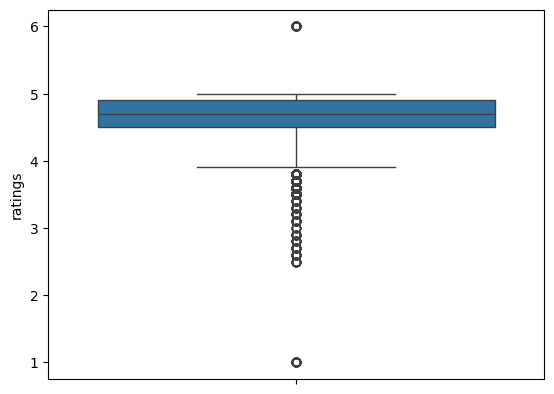

In [ ]:
# boxplot

sns.boxplot(df['ratings'].astype(float))

1. **The Minors data have ratings as 1 which seems like an anomaly if we generally consider the ratings column distribution.**

2. **The rating of 6 is also one another anomaly in the data as maximum ratings are 5 and not more than that**
    - Has to be investigated
    - If data is problematic than fixing or removing is an option

In [ ]:
# rows where the star rating is 6

six_star_data = df.loc[df['ratings'] == "6"]

len(six_star_data)

53

In [ ]:
six_star_data

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
3586,0x46d,BANGRES05DEL01,50,6,-12.970324,-77.645748,13.010324,77.685748,13-03-2022,NaN,12:30:00,conditions NaN,NaN,3,Meal,electric_scooter,0,No,Urban,(min) 25
4714,0x493,HYDRES17DEL01,50,6,-17.451976,-78.385883,17.561976,78.495883,04-04-2022,NaN,23:20:00,conditions NaN,NaN,3,Snack,bicycle,0,No,Metropolitian,(min) 27
5169,0x4f2,JAPRES08DEL01,50,6,-26.910262,-75.783013,27.020262,75.893013,18-03-2022,NaN,18:50:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Metropolitian,(min) 20
5362,0x430,BANGRES19DEL01,50,6,12.914264,77.678400,13.024264,77.788400,06-04-2022,NaN,20:55:00,conditions NaN,NaN,3,Meal,electric_scooter,1,No,Metropolitian,(min) 18
5651,0xbef1,AGRRES13DEL02,50,6,-27.159795,-78.042990,27.209795,78.092990,13-02-2022,NaN,18:05:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Metropolitian,(min) 20
6394,0x427,JAPRES06DEL02,50,6,26.911927,75.797282,27.041927,75.927282,02-04-2022,NaN,22:10:00,conditions NaN,NaN,3,Meal,electric_scooter,0,No,Urban,(min) 20
7031,0x3eb,MYSRES15DEL02,50,6,-12.352058,-76.606650,12.372058,76.626650,15-03-2022,NaN,10:00:00,conditions NaN,NaN,3,Buffet,scooter,1,No,Metropolitian,(min) 14
7681,0xd42,VADRES09DEL01,50,6,0.000000,0.000000,0.010000,0.010000,21-03-2022,NaN,08:35:00,conditions NaN,NaN,3,Meal,bicycle,1,No,Metropolitian,(min) 22
9499,0x3f0,BANGRES010DEL01,50,6,12.933298,77.614293,13.003298,77.684293,12-03-2022,NaN,18:25:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Urban,(min) 17
9535,0x3ef,RANCHIRES13DEL01,50,6,-23.374989,-85.335486,23.444989,85.405486,20-03-2022,NaN,17:55:00,conditions NaN,NaN,3,Snack,bicycle,1,No,Metropolitian,(min) 32


In [ ]:
six_star_index = six_star_data.index.tolist()

**Investigate further before action**

Data removal seems logical at this stage.

### Location Columns

In [ ]:
location_columns = df.columns[4:8].tolist()

location_columns

['restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude']

In [ ]:
location_subset = df.loc[:,location_columns]
location_subset

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
0,22.745049,75.892471,22.765049,75.912471
1,12.913041,77.683237,13.043041,77.813237
2,12.914264,77.678400,12.924264,77.688400
3,11.003669,76.976494,11.053669,77.026494
4,12.972793,80.249982,13.012793,80.289982
...,...,...,...,...
45588,26.902328,75.794257,26.912328,75.804257
45589,0.000000,0.000000,0.070000,0.070000
45590,13.022394,80.242439,13.052394,80.272439
45591,11.001753,76.986241,11.041753,77.026241


**Valid values for lat and long**

 > India lies to the north of the equator between `6° 44′` and `35° 30′` north latitude and `68° 7′` and `97° 25′` east longitude.

In [ ]:
# statistical analysis

location_subset.describe()

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702
std,8.185109,22.883647,7.335122,21.118812
min,-30.905562,-88.366217,0.010000,0.010000
25%,12.933284,73.170000,12.988453,73.280000
50%,18.546947,75.898497,18.633934,76.002574
75%,22.728163,78.044095,22.785049,78.107044
max,30.914057,88.433452,31.054057,88.563452


In [ ]:
# set the lower bound limits for the lat and long

lower_bound_lat = 6.44
lower_bound_long = 68.70

In [ ]:
# rows of data where latitude and longitude values are below the bounds

df.loc[
    (df['restaurant_latitude'] < lower_bound_lat) |
    (df['restaurant_longitude'] < lower_bound_long) |
    (df['delivery_latitude'] < lower_bound_lat) |
    (df['delivery_longitude'] < lower_bound_long)
].sample(50)

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
8498,0xa174,VADRES12DEL03,21,4.7,0.000000,0.000000,0.030000,0.030000,11-03-2022,17:35:00,17:50:00,conditions Sunny,Medium,1,Snack,scooter,0,No,Urban,(min) 11
7196,0x8a8f,VADRES17DEL03,34,4.9,0.000000,0.000000,0.060000,0.060000,26-03-2022,19:20:00,19:25:00,conditions Stormy,Jam,1,Buffet,scooter,1,No,Metropolitian,(min) 31
22952,0xcbfc,GOARES05DEL01,28,4.8,0.000000,0.000000,0.110000,0.110000,18-02-2022,20:00:00,20:05:00,conditions Sunny,Jam,0,Drinks,motorcycle,1,No,Metropolitian,(min) 26
29603,0x861c,VADRES18DEL01,39,5,0.000000,0.000000,0.040000,0.040000,01-04-2022,12:45:00,13:00:00,conditions Fog,High,0,Meal,motorcycle,0,No,Metropolitian,(min) 31
34375,0x7c81,RANCHIRES12DEL01,38,4.9,0.000000,0.000000,0.010000,0.010000,19-03-2022,09:35:00,09:45:00,conditions Sunny,Low,2,Drinks,scooter,1,No,Metropolitian,(min) 14
32952,0xcc4e,AGRRES02DEL02,34,4.9,0.000000,0.000000,0.020000,0.020000,11-02-2022,08:55:00,09:10:00,conditions Windy,Low,2,Snack,scooter,0,No,Metropolitian,(min) 29
13730,0xccac,BHPRES07DEL02,29,4.7,0.000000,0.000000,0.130000,0.130000,14-02-2022,23:30:00,23:45:00,conditions Sunny,Low,0,Meal,motorcycle,0,No,Urban,(min) 20
3271,0xab7e,RANCHIRES03DEL01,29,4.7,0.000000,0.000000,0.110000,0.110000,08-03-2022,21:10:00,21:20:00,conditions Sandstorms,Jam,1,Snack,scooter,1,No,Metropolitian,(min) 28
24808,0xad81,VADRES04DEL01,28,4.5,0.000000,0.000000,0.110000,0.110000,06-04-2022,22:10:00,22:20:00,conditions Stormy,Low,0,Meal,motorcycle,0,No,Metropolitian,(min) 23
17073,0xccf1,BHPRES19DEL03,25,4.6,0.000000,0.000000,0.060000,0.060000,13-02-2022,21:25:00,21:40:00,conditions Cloudy,Jam,2,Snack,motorcycle,1,No,Metropolitian,(min) 27


In [ ]:
# number of rows in data where lat long are erroneous

location_subset.loc[
    (location_subset['restaurant_latitude'] < lower_bound_lat) |
    (location_subset['restaurant_longitude'] < lower_bound_long) |
    (location_subset['delivery_latitude'] < lower_bound_lat) |
    (location_subset['delivery_longitude'] < lower_bound_long)
].shape[0]

4071

**There are 4071 rows in the data where the lat long columns are messy**

In [ ]:
# statistical summary of problematic rows where lat long is below the country's geographical limits

location_subset.loc[
    (location_subset['restaurant_latitude'] < lower_bound_lat) |
    (location_subset['restaurant_longitude'] < lower_bound_long) |
    (location_subset['delivery_latitude'] < lower_bound_lat) |
    (location_subset['delivery_longitude'] < lower_bound_long)
].describe()

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,4071.000000,4071.000000,4071.000000,4071.000000
mean,-2.149416,2.068601,2.212538,8.299885
std,6.537913,25.270676,6.538283,23.980011
min,-30.905562,-88.366217,0.010000,0.010000
25%,0.000000,0.000000,0.040000,0.040000
50%,0.000000,0.000000,0.070000,0.070000
75%,0.000000,0.000000,0.110000,0.110000
max,0.000000,88.433452,31.045562,88.523452


(array([1, 2, 3, 4]),
 [Text(1, 0, 'restaurant_latitude'),
  Text(2, 0, 'restaurant_longitude'),
  Text(3, 0, 'delivery_latitude'),
  Text(4, 0, 'delivery_longitude')])

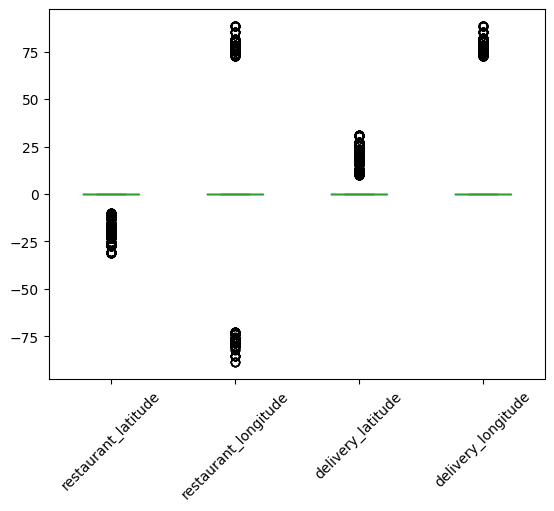

In [ ]:
# boxplots for all the anomalies

location_subset.loc[
    (location_subset['restaurant_latitude'] < lower_bound_lat) |
    (location_subset['restaurant_longitude'] < lower_bound_long) |
    (location_subset['delivery_latitude'] < lower_bound_lat) |
    (location_subset['delivery_longitude'] < lower_bound_long)
].plot(kind="box")

plt.xticks(rotation=45)

**Negative Values are correct just we have to take absolute**

**While calculating the distances we can assign null values to these erroneous data points and then impute the values using advanced imputation techniques**

[Text(1, 0, 'restaurant_latitude'),
 Text(2, 0, 'restaurant_longitude'),
 Text(3, 0, 'delivery_latitude'),
 Text(4, 0, 'delivery_longitude')]

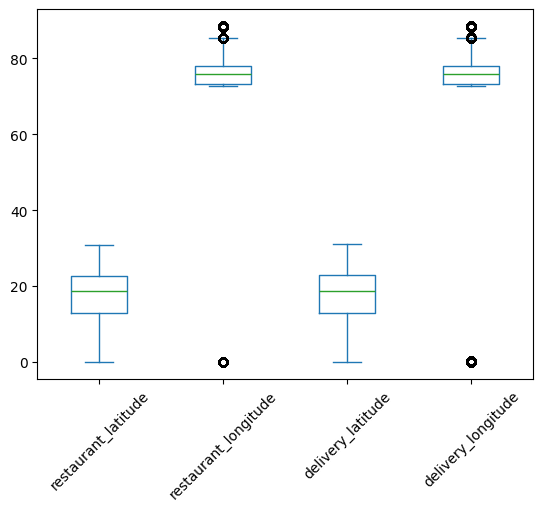

In [ ]:
# taking the absolute values

(
    location_subset.abs()
    .plot(kind="box")
)

ax = plt.gca()

ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [ ]:
# number of rows after taking absolute values

(
    location_subset.abs()
    .loc[lambda df_:
        (df_['restaurant_latitude'] < lower_bound_lat) |
        (df_['restaurant_longitude'] < lower_bound_long) |
        (df_['delivery_latitude'] < lower_bound_lat) |
        (df_['delivery_longitude'] < lower_bound_long)]
    .shape[0]

)

3640

**`3640` rows in the data that have messy lat long values**

In [ ]:
# lat long values less than 1

location_subset.abs().loc[lambda df_:
                        (df_['restaurant_latitude'] < 1) |
                        (df_['restaurant_longitude'] < 1) |
                        (df_['delivery_latitude'] < 1) |
                        (df_['delivery_longitude'] < 1)]

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
33,0.0,0.0,0.11,0.11
52,0.0,0.0,0.03,0.03
57,0.0,0.0,0.08,0.08
59,0.0,0.0,0.06,0.06
67,0.0,0.0,0.02,0.02
...,...,...,...,...
45569,0.0,0.0,0.07,0.07
45576,0.0,0.0,0.13,0.13
45577,0.0,0.0,0.09,0.09
45579,0.0,0.0,0.05,0.05


**All the messy lat long values are less than 1**

In [ ]:
def clean_lat_long(data: pd.DataFrame, threshold=1):
    location_columns = location_subset.columns.tolist()

    return (
        data
        .assign(**{
            col: (
                np.where(data[col] < threshold, np.NaN, data[col].values)
            )
            for col in location_columns
        })
    )

In [ ]:
clean_lat_long(df).isna().sum()

,0
id,0
rider_id,0
age,0
ratings,0
restaurant_latitude,4071
restaurant_longitude,3802
delivery_latitude,3640
delivery_longitude,3640
order_date,0
order_time,0


### Order Date

In [ ]:
# check for missing values

df['order_date'].isna().sum()

0

In [ ]:
# unique values in order date

df['order_date'].unique()

array(['19-03-2022', '25-03-2022', '05-04-2022', '26-03-2022',
       '11-03-2022', '04-03-2022', '14-03-2022', '20-03-2022',
       '12-02-2022', '13-02-2022', '14-02-2022', '02-04-2022',
       '01-03-2022', '16-03-2022', '15-02-2022', '10-03-2022',
       '27-03-2022', '12-03-2022', '01-04-2022', '05-03-2022',
       '11-02-2022', '08-03-2022', '03-04-2022', '30-03-2022',
       '28-03-2022', '18-03-2022', '06-04-2022', '04-04-2022',
       '24-03-2022', '09-03-2022', '02-03-2022', '13-03-2022',
       '29-03-2022', '31-03-2022', '17-03-2022', '07-03-2022',
       '15-03-2022', '16-02-2022', '03-03-2022', '18-02-2022',
       '23-03-2022', '17-02-2022', '06-03-2022', '21-03-2022'],
      dtype=object)

In [ ]:
# date range

order_date = pd.to_datetime(df['order_date'],dayfirst=True)

order_date.max() - order_date.min()

Timedelta('54 days 00:00:00')

In [ ]:
# min and maximum dates

order_date.agg(["min","max"]).set_axis(["start","end"],axis=0)

,order_date
start,2022-02-11
end,2022-04-06


In [ ]:
# extract day, day name, month and year

def extract_datetime_features(ser):
    date_col = pd.to_datetime(ser,dayfirst=True)

    return (
        pd.DataFrame(
            {
                "day": date_col.dt.day,
                "month": date_col.dt.month,
                "year": date_col.dt.year,
                "day_of_week": date_col.dt.day_name(),
                "is_weekend": date_col.dt.day_name().isin(["Saturday","Sunday"]).astype(int)
            }
        ))

In [ ]:
extract_datetime_features(df['order_date'])

,day,month,year,day_of_week,is_weekend
0,19,3,2022,Saturday,1
1,25,3,2022,Friday,0
2,19,3,2022,Saturday,1
3,5,4,2022,Tuesday,0
4,26,3,2022,Saturday,1
...,...,...,...,...,...
45588,24,3,2022,Thursday,0
45589,16,2,2022,Wednesday,0
45590,11,3,2022,Friday,0
45591,7,3,2022,Monday,0


### Order time and Order picked time

In [ ]:
# extract hour info from data

order_time_hr = pd.to_datetime(df.replace("NaN ",np.NaN)['order_time'],format='mixed').dt.hour

order_time_hr

,order_time
0,11.0
1,19.0
2,8.0
3,18.0
4,13.0
...,...
45588,11.0
45589,19.0
45590,23.0
45591,13.0


In [ ]:
def time_of_day(ser):
    time_col = pd.to_datetime(ser,format='mixed').dt.hour

    return(
        np.select(condlist=[(ser.between(6,12,inclusive='left')),
                            (ser.between(12,17,inclusive='left')),
                            (ser.between(17,20,inclusive='left')),
                            (ser.between(20,24,inclusive='left'))],
                  choicelist=["morning","afternoon","evening","night"],
                  default="after_midnight")
    )

In [ ]:
time_subset = df.loc[:,["order_time","order_picked_time"]]
time_subset

,order_time,order_picked_time
0,11:30:00,11:45:00
1,19:45:00,19:50:00
2,08:30:00,08:45:00
3,18:00:00,18:10:00
4,13:30:00,13:45:00
...,...,...
45588,11:35:00,11:45:00
45589,19:55:00,20:10:00
45590,23:50:00,00:05:00
45591,13:35:00,13:40:00


In [ ]:
(
    time_subset
    .dtypes
)

,0
order_time,object
order_picked_time,object


In [ ]:
time_subset.columns.tolist()

['order_time', 'order_picked_time']

In [ ]:
# calculate the pickup time

(
    time_subset
    .assign(**{
        col: pd.to_datetime(time_subset[col].replace("NaN ",np.NaN).dropna(),format="mixed")
        for col in time_subset.columns.tolist()}
    )
    .assign(
        pickup_time = lambda x: (x['order_picked_time'] - x['order_time']).dt.seconds / 60,
        order_time_hour = lambda x: x['order_time'].dt.hour,
        order_time_of_day = lambda x: x['order_time_hour'].pipe(time_of_day)
    )
    .drop(columns=["order_time","order_picked_time"])
)

,pickup_time,order_time_hour,order_time_of_day
0,15.0,11.0,morning
1,5.0,19.0,evening
2,15.0,8.0,morning
3,10.0,18.0,evening
4,15.0,13.0,afternoon
...,...,...,...
45588,10.0,11.0,morning
45589,15.0,19.0,evening
45590,15.0,23.0,night
45591,5.0,13.0,afternoon


### Weather

In [ ]:
# value counts

df['weather'].value_counts()

,count
weather,
conditions Fog,7654
conditions Stormy,7586
conditions Cloudy,7536
conditions Sandstorms,7495
conditions Windy,7422
conditions Sunny,7284
conditions NaN,616


In [ ]:
# unique values
df['weather'].unique()

array(['conditions Sunny', 'conditions Stormy', 'conditions Sandstorms',
       'conditions Cloudy', 'conditions Fog', 'conditions Windy',
       'conditions NaN'], dtype=object)

In [ ]:
# remove conditions from values

(
    df['weather']
    .str.replace("conditions ","")
    .unique()
)

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy', 'NaN'],
      dtype=object)

### Traffic

In [ ]:
# value counts

df['traffic'].value_counts()

,count
traffic,
Low,15477
Jam,14143
Medium,10947
High,4425
NaN,601


In [ ]:
# unique values
df['traffic'].unique()

array(['High ', 'Jam ', 'Low ', 'Medium ', 'NaN '], dtype=object)

In [ ]:
(
    df['traffic']
    .replace("NaN ",np.NaN)
    .str.rstrip()
    .str.lower()
    .unique()
)

array(['high', 'jam', 'low', 'medium', nan], dtype=object)

### Vehicle Condition

In [ ]:
# unique values in column

np.sort(df['vehicle_condition'].unique())

array([0, 1, 2, 3])

### Type of order

In [ ]:
# value counts

df['type_of_order'].value_counts()

,count
type_of_order,
Snack,11533
Meal,11458
Drinks,11322
Buffet,11280


In [ ]:
# unique values
df['type_of_order'].unique()

array(['Snack ', 'Drinks ', 'Buffet ', 'Meal '], dtype=object)

In [ ]:
(
    df['type_of_order']
    .str.rstrip()
    .str.lower()
    .unique()
)

array(['snack', 'drinks', 'buffet', 'meal'], dtype=object)

### Type of vehicle

In [ ]:
# value counts

df['type_of_vehicle'].value_counts()

,count
type_of_vehicle,
motorcycle,26435
scooter,15276
electric_scooter,3814
bicycle,68


In [ ]:
# unique values
df['type_of_vehicle'].unique()

array(['motorcycle ', 'scooter ', 'electric_scooter ', 'bicycle '],
      dtype=object)

In [ ]:
(
    df['type_of_vehicle']
    .str.rstrip()
    .str.lower()
    .unique()
)

array(['motorcycle', 'scooter', 'electric_scooter', 'bicycle'],
      dtype=object)

### Multiple Deliveries

In [ ]:
# datatype of multiple deliveries column

df['multiple_deliveries'].dtype

dtype('O')

In [ ]:
# unique values in column

df['multiple_deliveries'].unique()

array(['0', '1', '3', 'NaN ', '2'], dtype=object)

In [ ]:
# make the column as integer

(
    df['multiple_deliveries']
    .replace("NaN ",np.NaN)
    .astype(float)
    .unique()
)

array([ 0.,  1.,  3., nan,  2.])

### Festival

In [ ]:
# unique values in column

df['festival'].unique()

array(['No ', 'Yes ', 'NaN '], dtype=object)

In [ ]:
(
    df['festival']
    .replace("NaN ",np.NaN)
    .str.rstrip()
    .str.lower()
    .unique()
)

array(['no', 'yes', nan], dtype=object)

### City type

In [ ]:
# unique values in city type

df['city_type'].unique()

array(['Urban ', 'Metropolitian ', 'Semi-Urban ', 'NaN '], dtype=object)

In [ ]:
(
    df['city_type']
    .replace("NaN ",np.NaN)
    .str.rstrip()
    .str.lower()
    .unique()
)

array(['urban', 'metropolitian', 'semi-urban', nan], dtype=object)

### Time Taken

In [ ]:
# datatype of time taken

df['time_taken'].dtype

dtype('O')

In [ ]:
(
    df['time_taken']
    .str.replace("(min) ","")
    .astype(int)
)

,time_taken
0,24
1,33
2,26
3,21
4,30
...,...
45588,32
45589,36
45590,16
45591,26


## Perform Cleaning and Feature Building

In [ ]:
df.columns

Index(['id', 'rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'order_time', 'order_picked_time', 'weather', 'traffic',
       'vehicle_condition', 'type_of_order', 'type_of_vehicle',
       'multiple_deliveries', 'festival', 'city_type', 'time_taken'],
      dtype='object')

In [ ]:
def data_cleaning(data: pd.DataFrame):

    return (
        data
        .drop(columns="id")
        .drop(index=minor_index)                                                # Minor riders in data dropped
        .drop(index=six_star_index)                                             # six star rated drivers dropped
        .replace("NaN ",np.NaN)                                                 # missing values in the data
        .assign(
            # city column out of rider id
            city_name = lambda x: x['rider_id'].str.split("RES").str.get(0),
            # convert age to float
            age = lambda x: x['age'].astype(float),
            # convert ratings to float
            ratings = lambda x: x['ratings'].astype(float),
            # absolute values for location based columns
            restaurant_latitude = lambda x: x['restaurant_latitude'].abs(),
            restaurant_longitude = lambda x: x['restaurant_longitude'].abs(),
            delivery_latitude = lambda x: x['delivery_latitude'].abs(),
            delivery_longitude = lambda x: x['delivery_longitude'].abs(),
            # order date to datetime and feature extraction
            order_date = lambda x: pd.to_datetime(x['order_date'],
                                                  dayfirst=True),
            order_day = lambda x: x['order_date'].dt.day,
            order_month = lambda x: x['order_date'].dt.month,
            order_day_of_week = lambda x: x['order_date'].dt.day_name().str.lower(),
            is_weekend = lambda x: (x['order_date']
                                    .dt.day_name()
                                    .isin(["Saturday","Sunday"])
                                    .astype(int)),
            # time based columns
            order_time = lambda x: pd.to_datetime(x['order_time'],
                                                  format='mixed'),
            order_picked_time = lambda x: pd.to_datetime(x['order_picked_time'],
                                                         format='mixed'),
            # time taken to pick order
            pickup_time_minutes = lambda x: (
                                            (x['order_picked_time'] - x['order_time'])
                                            .dt.seconds / 60
                                            ),
            # hour in which order was placed
            order_time_hour = lambda x: x['order_time'].dt.hour,
            # time of the day when order was placed
            order_time_of_day = lambda x: (
                                x['order_time_hour'].pipe(time_of_day)),
            # categorical columns
            weather = lambda x: (
                                x['weather']
                                .str.replace("conditions ","")
                                .str.lower()
                                .replace("nan",np.NaN)),
            traffic = lambda x: x["traffic"].str.rstrip().str.lower(),
            type_of_order = lambda x: x['type_of_order'].str.rstrip().str.lower(),
            type_of_vehicle = lambda x: x['type_of_vehicle'].str.rstrip().str.lower(),
            festival = lambda x: x['festival'].str.rstrip().str.lower(),
            city_type = lambda x: x['city_type'].str.rstrip().str.lower(),
            # multiple deliveries column
            multiple_deliveries = lambda x: x['multiple_deliveries'].astype(float),
            # target column modifications
            time_taken = lambda x: (x['time_taken']
                                    .str.replace("(min) ","")
                                    .astype(int)))
        .drop(columns=["order_time","order_picked_time"])
    )

In [ ]:
df

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [ ]:
data_cleaning(df)

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,city_type,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,urban,24,INDO,19,3,saturday,1,15.0,11.0,morning
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,metropolitian,33,BANG,25,3,friday,0,5.0,19.0,evening
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,urban,26,BANG,19,3,saturday,1,15.0,8.0,morning
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,metropolitian,21,COIMB,5,4,tuesday,0,10.0,18.0,evening
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,metropolitian,30,CHEN,26,3,saturday,1,15.0,13.0,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,windy,high,...,metropolitian,32,JAP,24,3,thursday,0,10.0,11.0,morning
45589,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,windy,jam,...,metropolitian,36,AGR,16,2,wednesday,0,15.0,19.0,evening
45590,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,cloudy,low,...,metropolitian,16,CHEN,11,3,friday,0,15.0,23.0,night
45591,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,cloudy,high,...,metropolitian,26,COIMB,7,3,monday,0,5.0,13.0,afternoon


In [ ]:
location_subset.columns.tolist()

['restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude']

In [ ]:
def calculate_haversine_distance(df):
    location_columns = location_subset.columns.tolist()
    lat1 = df[location_columns[0]]
    lon1 = df[location_columns[1]]
    lat2 = df[location_columns[2]]
    lon2 = df[location_columns[3]]

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(
        dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    distance = 6371 * c

    return (
        df.assign(
            distance = distance)
    )

In [ ]:
# add more data cleaning steps

cleaned_data = (
                df.pipe(data_cleaning)
                .pipe(clean_lat_long)
                .pipe(calculate_haversine_distance)
                )

cleaned_data

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,24,INDO,19,3,saturday,1,15.0,11.0,morning,3.025149
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,33,BANG,25,3,friday,0,5.0,19.0,evening,20.183530
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,26,BANG,19,3,saturday,1,15.0,8.0,morning,1.552758
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,21,COIMB,5,4,tuesday,0,10.0,18.0,evening,7.790401
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,30,CHEN,26,3,saturday,1,15.0,13.0,afternoon,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,windy,high,...,32,JAP,24,3,thursday,0,10.0,11.0,morning,1.489846
45589,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,windy,jam,...,36,AGR,16,2,wednesday,0,15.0,19.0,evening,NaN
45590,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,cloudy,low,...,16,CHEN,11,3,friday,0,15.0,23.0,night,4.657195
45591,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,cloudy,high,...,26,COIMB,7,3,monday,0,5.0,13.0,afternoon,6.232393


## Validate Data Cleaning

In [ ]:
# age column

cleaned_data['age'].agg(["min","max"])

,age
min,20.0
max,39.0


In [ ]:
# ratings column

cleaned_data['ratings'].agg(["min","max"])

,ratings
min,2.5
max,5.0


,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,41872.000000,41872.000000,41872.000000,41872.000000
mean,18.913696,76.921664,18.977356,76.985325
std,5.467265,3.503107,5.469056,3.503260
min,9.957144,72.768726,9.967144,72.778726
25%,12.986047,73.897902,13.065996,73.940327
50%,19.065838,76.618203,19.124049,76.662620
75%,22.751234,78.368855,22.820040,78.405467
max,30.914057,88.433452,31.054057,88.563452


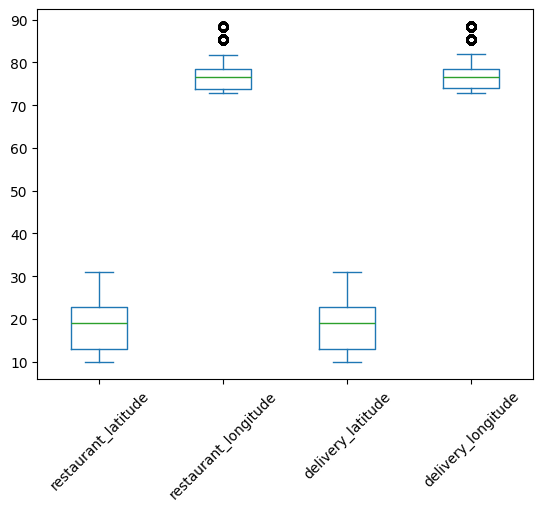

In [ ]:
# location columns

cleaned_data[location_columns].plot(kind="box")

plt.xticks(rotation=45)

display(cleaned_data[location_columns].describe())

In [ ]:
# values in categorical columns

cat_cols = cleaned_data.select_dtypes(include="object").columns.tolist()

for col in cat_cols:
    print(f"For {col} unique values are: {cleaned_data[col].unique()}",end="\n\n")

For rider_id unique values are: ['INDORES13DEL02 ' 'BANGRES18DEL02 ' 'BANGRES19DEL01 ' ...
 'KOCRES04DEL01 ' 'BHPRES06DEL03 ' 'GOARES03DEL03 ']

For weather unique values are: ['sunny' 'stormy' 'sandstorms' 'cloudy' 'fog' 'windy' nan]

For traffic unique values are: ['high' 'jam' 'low' 'medium' nan]

For type_of_order unique values are: ['snack' 'drinks' 'buffet' 'meal']

For type_of_vehicle unique values are: ['motorcycle' 'scooter' 'electric_scooter' 'bicycle']

For festival unique values are: ['no' 'yes' nan]

For city_type unique values are: ['urban' 'metropolitian' 'semi-urban' nan]

For city_name unique values are: ['INDO' 'BANG' 'COIMB' 'CHEN' 'HYD' 'RANCHI' 'MYS' 'DEH' 'KOC' 'PUNE'
 'LUDH' 'KNP' 'MUM' 'KOL' 'JAP' 'SUR' 'GOA' 'AURG' 'AGR' 'VAD' 'ALH' 'BHP']

For order_day_of_week unique values are: ['saturday' 'friday' 'tuesday' 'monday' 'sunday' 'wednesday' 'thursday']

For order_time_of_day unique values are: ['morning' 'evening' 'afternoon' 'night' 'after_midnight']



<Axes: >

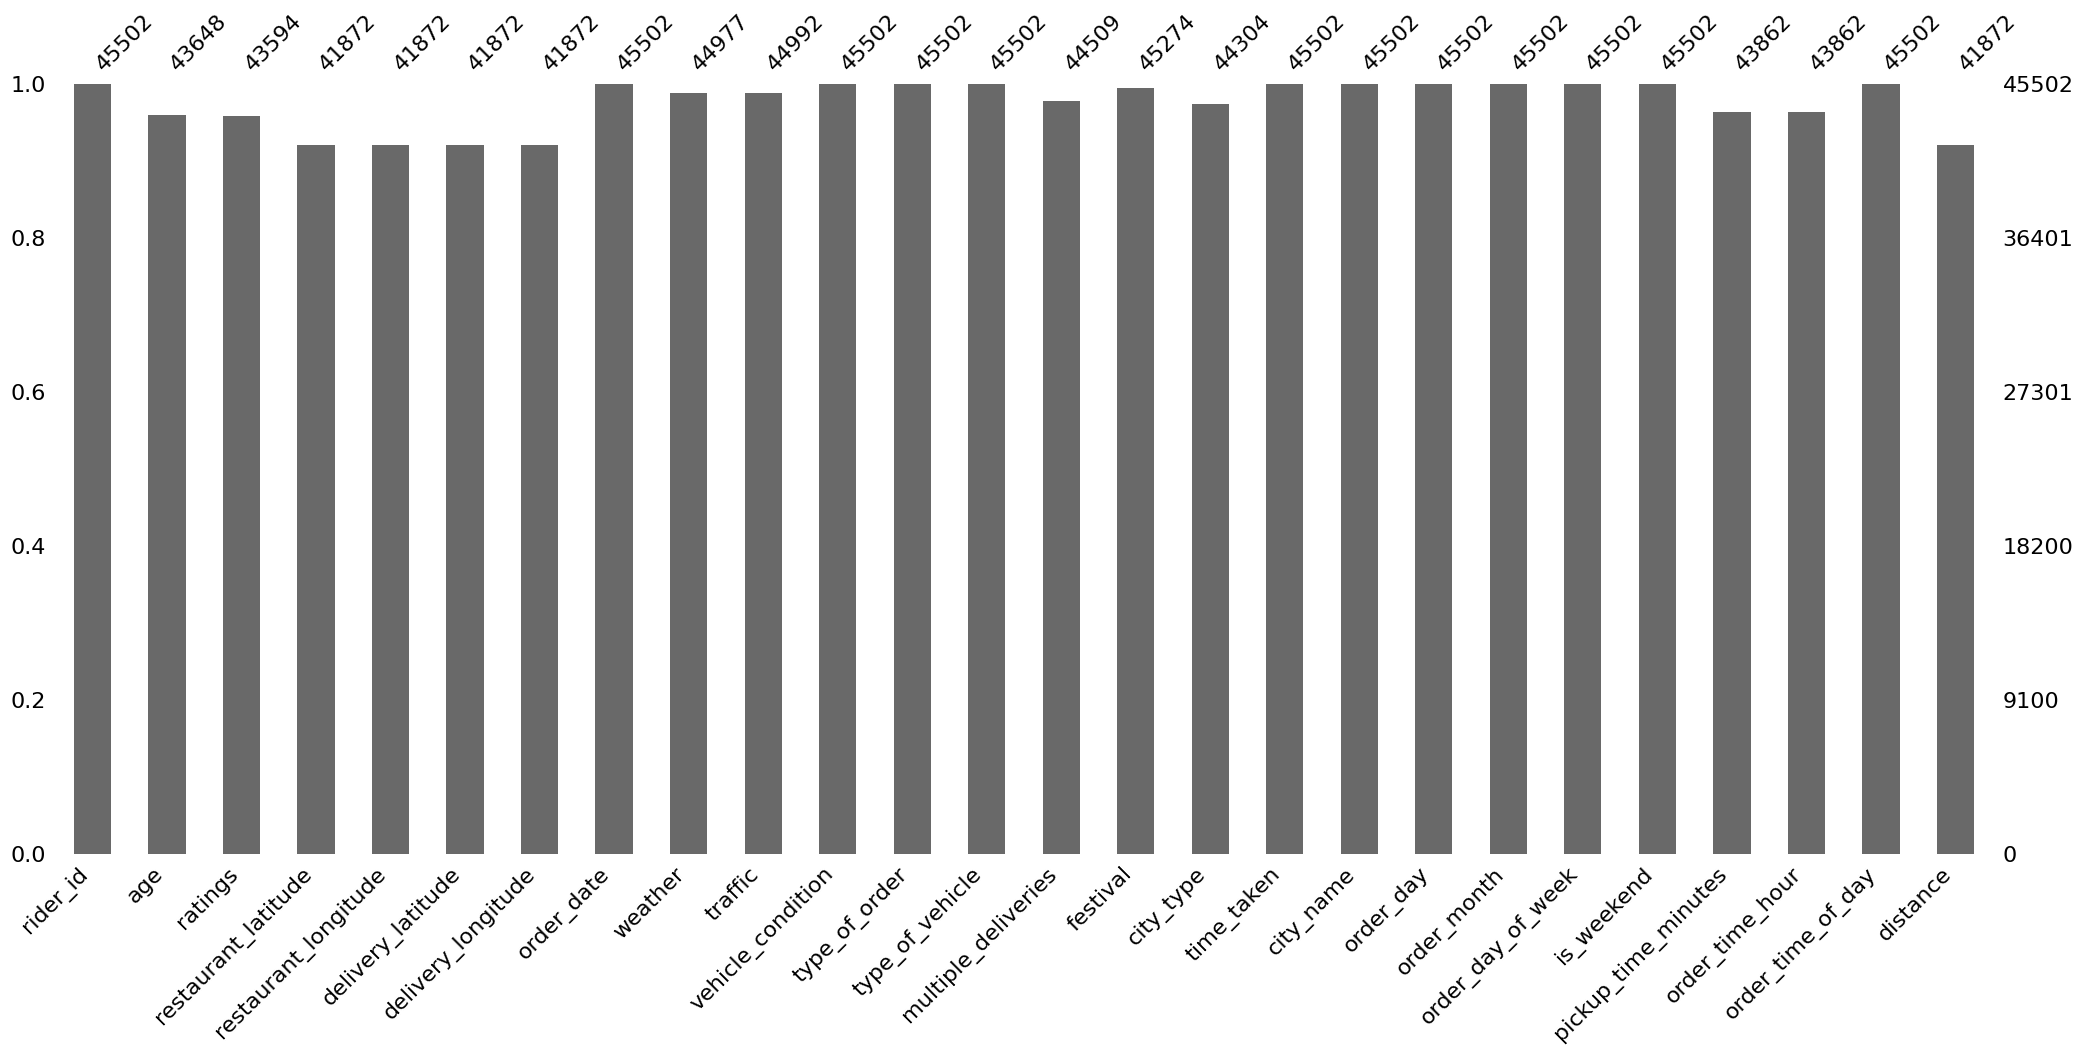

In [ ]:
# bar plot of missing values

msno.bar(cleaned_data)

<Axes: >

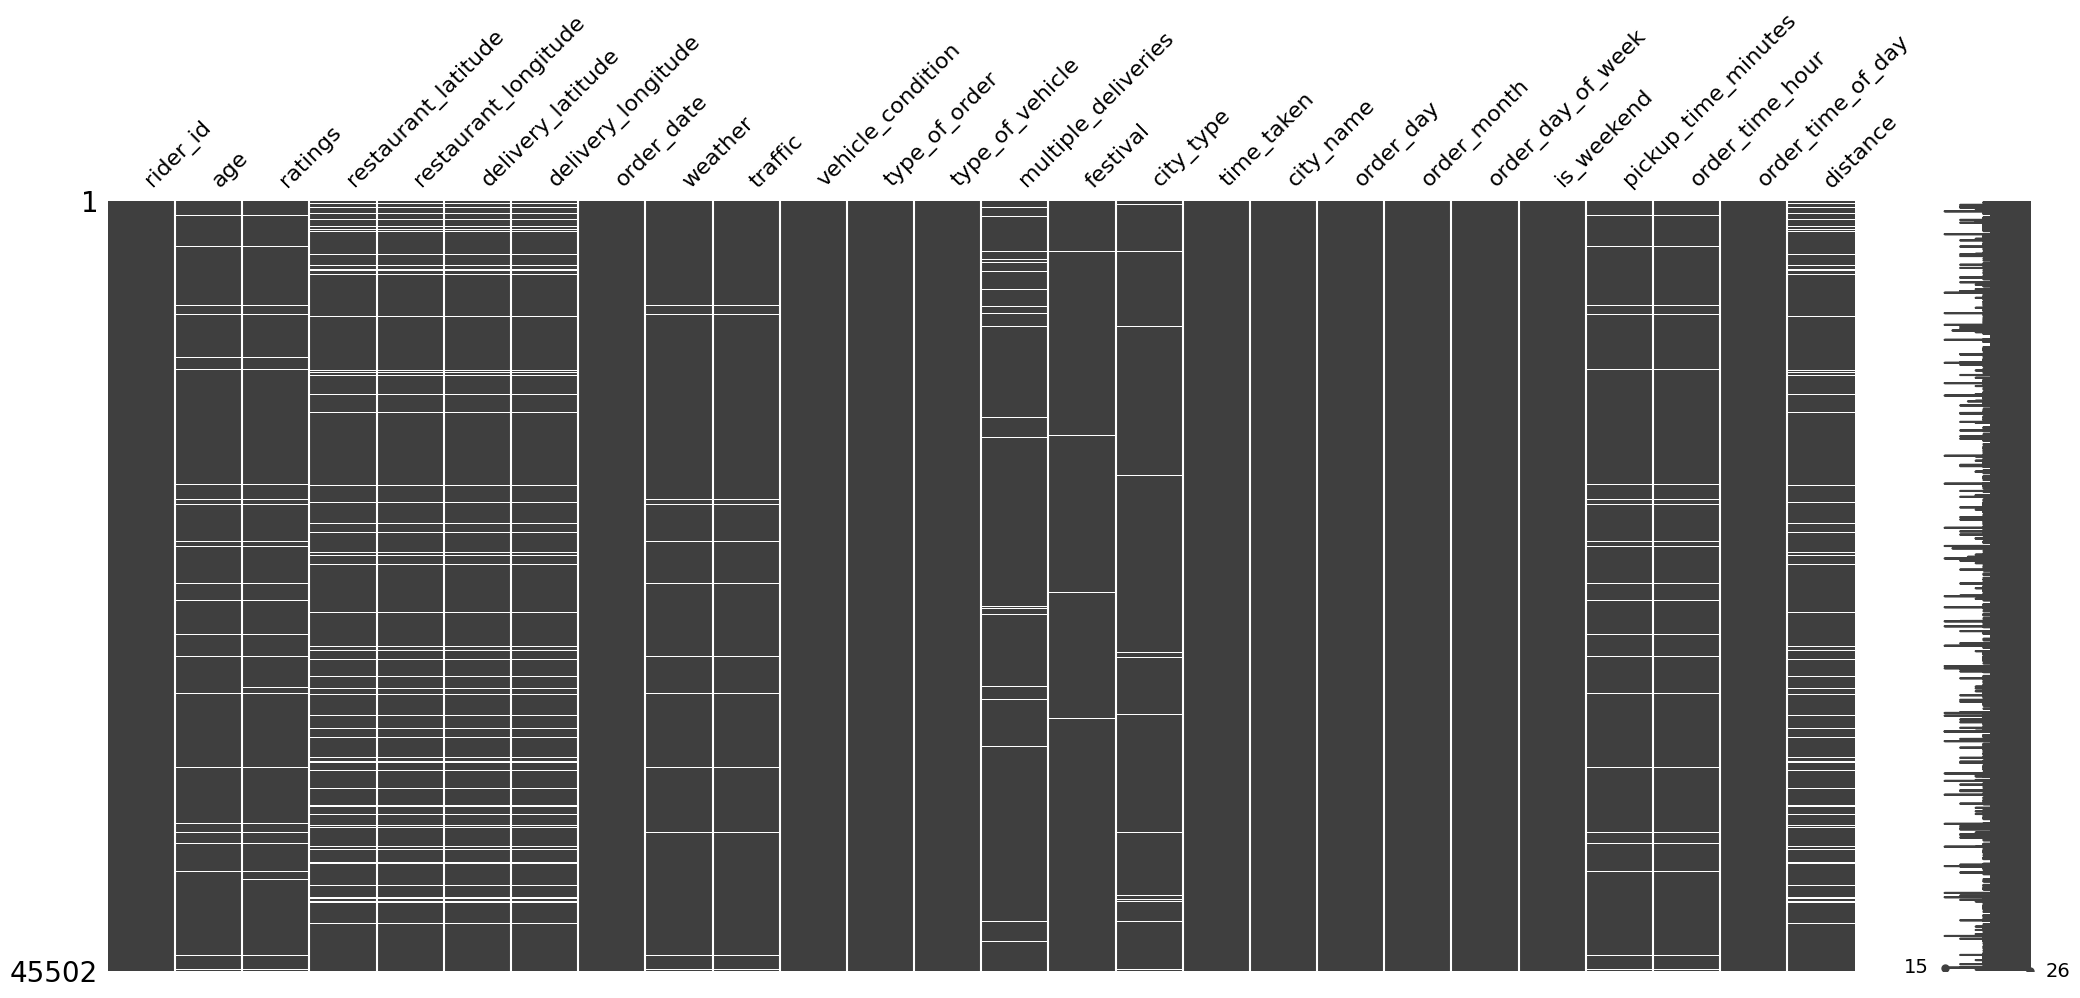

In [ ]:
# matrix of missing values

msno.matrix(cleaned_data)

<Axes: >

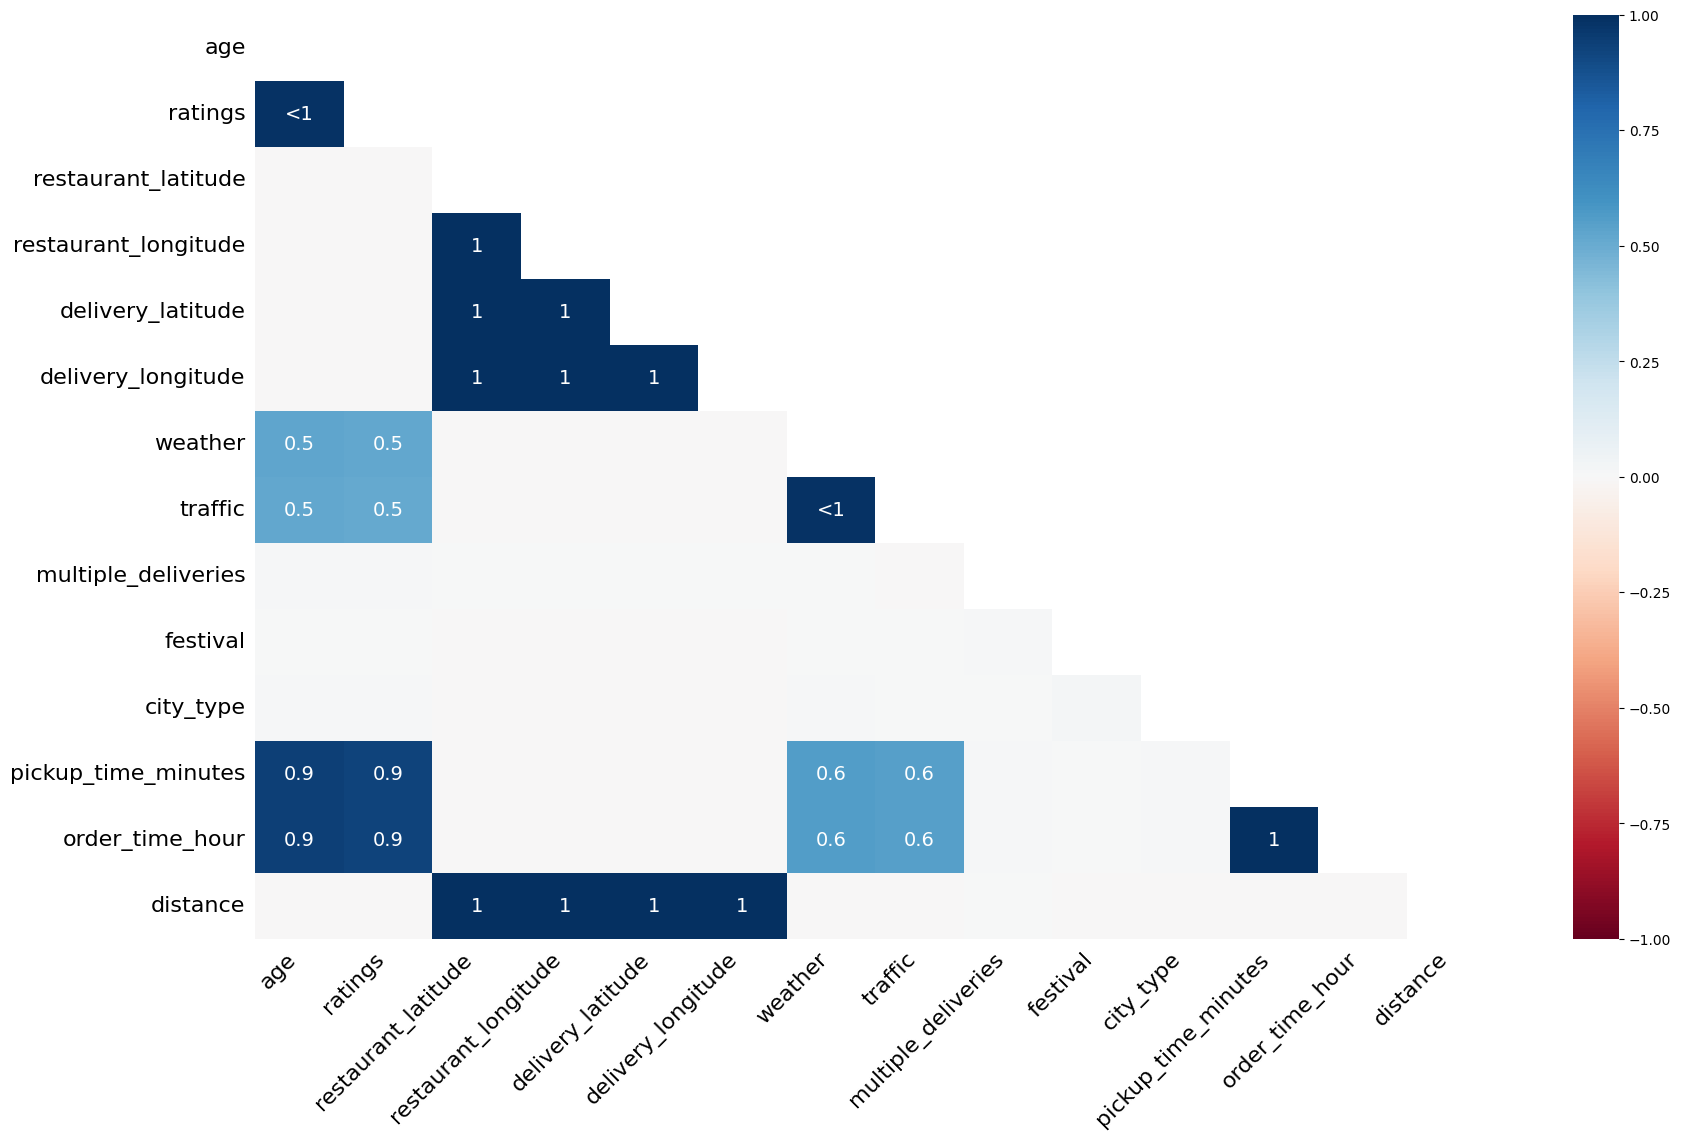

In [ ]:
# correlation chart of missing values
msno.heatmap(cleaned_data)

# Save Cleaned Data

In [ ]:
# save the cleaned data

cleaned_data.to_csv("cleaned_data.csv",index=False)

In [ ]:
# load the cleaned data

cleaned_data_load = pd.read_csv("cleaned_data.csv")

In [ ]:
# data types of cleaned data

cleaned_data_load.dtypes

,0
rider_id,object
age,float64
ratings,float64
restaurant_latitude,float64
restaurant_longitude,float64
delivery_latitude,float64
delivery_longitude,float64
order_date,object
weather,object
traffic,object


In [ ]:
cleaned_data_load

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,24,INDO,19,3,saturday,1,15.0,11.0,morning,3.025149
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,33,BANG,25,3,friday,0,5.0,19.0,evening,20.183530
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,26,BANG,19,3,saturday,1,15.0,8.0,morning,1.552758
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,21,COIMB,5,4,tuesday,0,10.0,18.0,evening,7.790401
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,30,CHEN,26,3,saturday,1,15.0,13.0,afternoon,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,windy,high,...,32,JAP,24,3,thursday,0,10.0,11.0,morning,1.489846
45498,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,windy,jam,...,36,AGR,16,2,wednesday,0,15.0,19.0,evening,NaN
45499,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,cloudy,low,...,16,CHEN,11,3,friday,0,15.0,23.0,night,4.657195
45500,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,cloudy,high,...,26,COIMB,7,3,monday,0,5.0,13.0,afternoon,6.232393
